In [30]:
import numpy as np 
from scipy import fftpack 
import pandas as pd
from matplotlib import pyplot as plt
import math 
from array import *

In [31]:
data =  pd.read_excel (r'F:\1.xlsx')
print(data)

          T  BMF  AMF1
0      0.00  0.0   0.0
1      0.01  0.0   0.0
2      0.02  0.0   0.0
3      0.03  0.0   0.0
4      0.04  0.0   0.0
5      0.05  0.0   0.0
6      0.06  0.0   0.0
7      0.07  0.0   0.0
8      0.08  0.0   0.0
9      0.09  0.0   0.0
10     0.10  0.0   0.0
11     0.11  0.0   0.0
12     0.12  0.0   0.0
13     0.13  0.0   0.0
14     0.14  0.0   0.0
15     0.15  0.0   0.0
16     0.16  0.0   0.0
17     0.17  0.0   0.0
18     0.18  0.0   0.0
19     0.19  0.0   0.0
20     0.20  0.0   0.0
21     0.21  0.0   0.0
22     0.22  0.0   0.0
23     0.23  0.0   0.0
24     0.24  0.0   0.0
25     0.25  0.0   0.0
26     0.26  0.0   0.0
27     0.27  0.0   0.0
28     0.28  0.0   0.0
29     0.29  0.0   0.0
...     ...  ...   ...
2570  25.70  0.0   0.0
2571  25.71  0.0   0.0
2572  25.72  0.0   0.0
2573  25.73  0.0   0.0
2574  25.74  0.0   0.0
2575  25.75  0.0   0.0
2576  25.76  0.0   0.0
2577  25.77  0.0   0.0
2578  25.78  0.0   0.0
2579  25.79  0.0   0.0
2580  25.80  0.0   0.0
2581  25.81

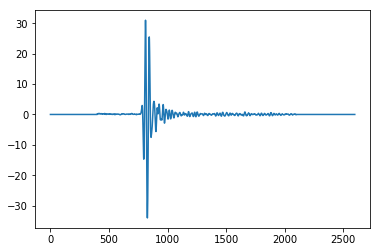

In [32]:
Before= data['BMF']
plt.plot(Before)
plt.show()

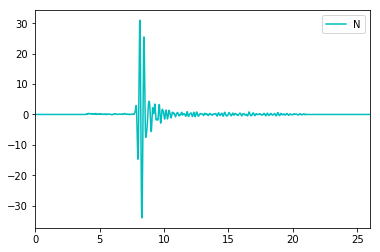

In [33]:
dt = 0.01
t = np.arange(0,26,dt)
f = Before
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()


[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


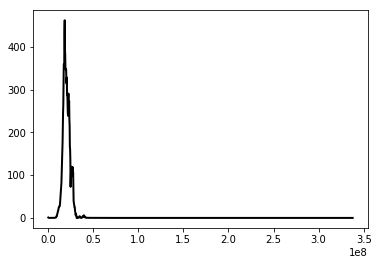

In [34]:
#Fast Fourier transform (FFT)
n = len(t)
fhat = np.fft.fft(f,n) #compute the FFT
PSD = fhat * np.conj(fhat)/n            #Power spectrum densoty
freq = (1/dt*n)*np.arange(n)
#freq = (1/dt)#creat x-axis of freq
freqq = (4,21,100)

L = np.arange(1,np.floor(n/2),dtype='int') 

print(freq)

plt.plot(freq[L],PSD[L],color='k',LineWidth=2,label='C')

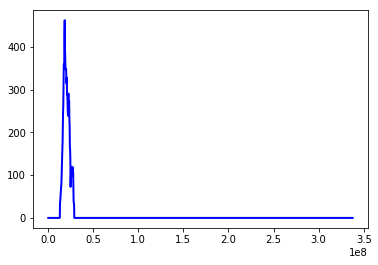

In [35]:
# By using PSD data, we can fillter out the noise 

indices = PSD>30
PSDclean = indices * PSD
fhat = indices*fhat
ifftt = np.fft.ifft(fhat)

plt.plot(freq[L],PSDclean[L],color='b',LineWidth=2,label='C')


plt.show()

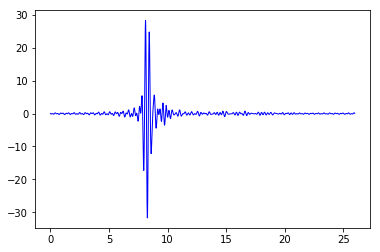

In [36]:
plt.plot(t,ifftt,color='b',LineWidth=1,label='C')

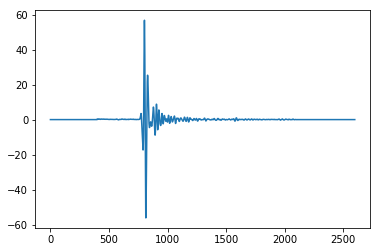

In [37]:
##Second pules
Second_P = data['AMF1']
plt.plot(Second_P)
plt.show()


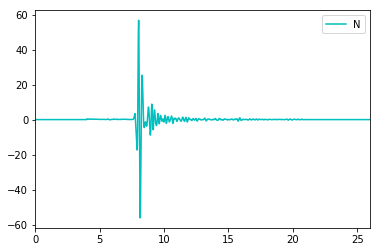

In [38]:
dt = 0.01
t = np.arange(0,26,dt)
f = Second_P
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()

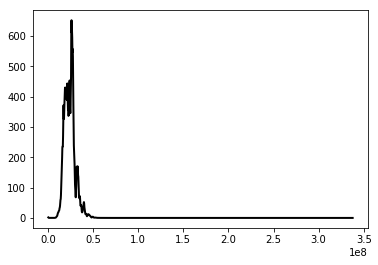

In [39]:
n = len(t)
fhat_Second = np.fft.fft(f,n) #compute the FFT
PSD_Second = fhat_Second * np.conj(fhat_Second)/n            #Power spectrum densoty
freq_Second = (1/dt*n)*np.arange(n)#creat x-axis of freq
Freq = (0,25,)
L = np.arange(1,np.floor(n/2),dtype='int')   
q = np.array(PSD_Second)
y = np.vectorize(PSD_Second)
plt.plot(freq_Second[L],PSD_Second[L],color='k',LineWidth=2,label='C')
print(y)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


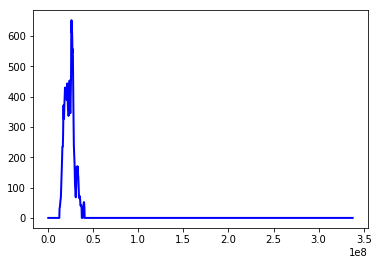

In [40]:
# By using PSD, we can fillter out the noise 

indices_Second = PSD_Second>30
PSDclean_Second = indices_Second * PSD_Second
fhat_Second = indices_Second*fhat_Second
ifftt_Second = np.fft.ifft(fhat_Second)

plt.plot(freq_Second[L],PSDclean_Second[L],color='b',LineWidth=2,label='C')

print(PSDclean_Second)


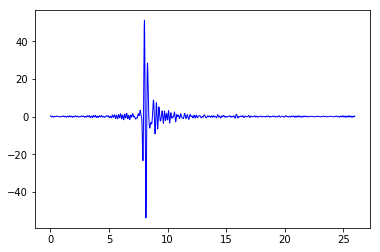

In [41]:
plt.plot(t,ifftt_Second,color='b',LineWidth=1,label='C')

In [49]:
alpha = -10*(np.log(PSDclean/PSDclean_Second))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [50]:
print(alpha)
print(freq_Second)

[nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


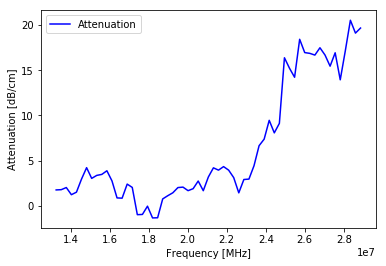

In [51]:
plt.plot(freq_Second[L],alpha[L],color='b',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()

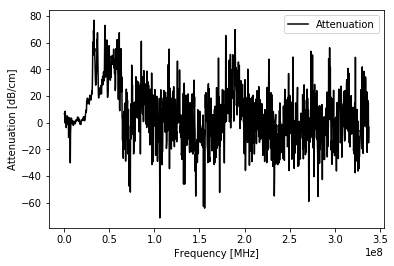

In [52]:
alpha2 = 10*(np.log((abs((PSD_Second/PSD)))))
plt.plot(freq_Second[L],alpha2[L],color='k',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()